In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving email.csv to email (1).csv


In [ ]:
df=pd.read_csv("email.csv")
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.shape

(5573, 2)

In [ ]:
df.dropna(inplace= True)

#dropping null rows

In [ ]:
import re
#function to clean the text

def clean_text(text):
  text = re.sub(r'<.*?>', " ", text)

  text = re.sub(r'[^a-zA-Z]', " ", text)

  text = text.lower()

  text = re.sub(r'\s+', " ", text)
  return text

In [ ]:
df["Message"]=df["Message"].apply(clean_text)

In [ ]:
df.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



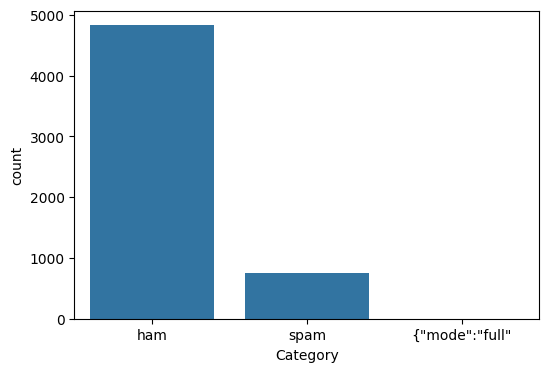

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x= "Category", data=df)
plt.show()

In [ ]:
df=df[df["Category"].isin(["ham", "spam"])]

In [ ]:
le=LabelEncoder()
df["encoded_label"]= le.fit_transform(df["Category"])

In [ ]:
df.head()

,Category,Message,encoded_label
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in a wkly comp to win fa cup final ...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i don t think he goes to usf he lives arou...,0


In [ ]:
x= df["Message"]
y= df["encoded_label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(x_train_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test_vec)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

